<a href="https://colab.research.google.com/github/anakhashibu1999/ML-projects/blob/main/imbalanced_data_set(framingham).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])



In [ ]:
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [ ]:
df.drop(['education'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#oversampling and undersampling
#oversampling
from imblearn.over_sampling import SMOTE#synthetic minority oversample technique
oversample=SMOTE()
Xo,yo=oversample.fit_resample(X,y)


In [ ]:
yo.value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xo,yo,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_train_new

array([[-0.77369421,  0.2064703 ,  1.10745134, ...,  0.25329099,
        -0.09913351, -0.96424864],
       [ 1.2925003 ,  0.80705477,  1.10745134, ..., -0.30830115,
        -0.09913351, -0.28613476],
       [ 1.2925003 , -0.15388038, -0.90297421, ..., -0.08263855,
         0.32944078,  0.12073357],
       ...,
       [-0.77369421,  0.44670409, -0.90297421, ..., -0.78270547,
         0.75801508, -0.591286  ],
       [-0.77369421, -1.83551689,  1.10745134, ..., -0.91605155,
        -0.27056323, -0.32004045],
       [ 1.2925003 , -0.39411417,  1.10745134, ...,  1.63590179,
         0.20444411,  0.35807342]])

In [ ]:
X_test_new=sc.transform(X_test)
X_test_new

array([[ 1.2925003 ,  1.04728855,  1.10745134, ..., -1.91358279,
        -0.95628211,  0.29026204],
       [-0.77369421, -0.63434796, -0.90297421, ..., -0.59999165,
         0.13389799, -0.31541958],
       [ 1.2925003 , -0.99469864,  1.10745134, ..., -0.75449764,
         1.3580191 , -0.08393289],
       ...,
       [-0.77369421, -0.75446485, -0.90297421, ...,  0.18748677,
        -0.04616674, -0.41184518],
       [-0.77369421, -1.47516621, -0.90297421, ..., -0.51344896,
        -0.09913351, -0.89643725],
       [-0.77369421,  0.32658719,  1.10745134, ..., -0.50622329,
        -0.48999754, -0.72690878]])

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1074
           1       0.73      0.89      0.80      1084

    accuracy                           0.78      2158
   macro avg       0.79      0.78      0.78      2158
weighted avg       0.79      0.78      0.78      2158



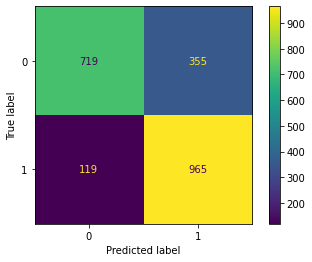

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
Xu,yu=under.fit_resample(X,y)

In [ ]:
yu.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

In [ ]:
Xu

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,34,0,0.0,0.0,0,0,0,170.0,121.0,74.0,20.82,67.0,83.0
1,1,39,1,20.0,0.0,0,0,1,195.0,106.0,80.0,23.57,85.0,132.0
2,0,45,1,9.0,0.0,0,0,0,268.0,110.0,64.0,20.68,63.0,71.0
3,1,37,0,0.0,0.0,0,1,0,195.0,141.0,84.0,25.66,83.0,117.0
4,0,54,1,17.0,0.0,0,0,0,205.0,96.0,66.0,23.26,85.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1,50,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0
1284,1,56,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0
1285,1,58,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0
1286,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xu,yu,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_train_new

array([[ 1.06539715,  0.8451966 ,  0.98567419, ...,  1.73656274,
         0.7514755 , -0.12388125],
       [-0.93861711,  1.07217786, -1.01453402, ..., -0.0473375 ,
        -0.636464  , -0.41040954],
       [-0.93861711, -1.76508792,  0.98567419, ..., -0.80825577,
        -0.473177  , -0.63326489],
       ...,
       [-0.93861711,  0.39123407, -1.01453402, ..., -0.84790241,
        -0.636464  , -0.25122716],
       [-0.93861711,  1.29915913, -1.01453402, ...,  0.22751262,
        -0.0649595 , -0.09320186],
       [-0.93861711, -0.74367224,  0.98567419, ..., -0.72152875,
         0.7514755 , -0.44224602]])

In [ ]:
X_test_new=sc.transform(X_test)
X_test_new

array([[ 1.06539715,  0.27774344,  0.98567419, ...,  0.49017159,
         1.159693  , -0.72877432],
       [ 1.06539715, -0.9706535 ,  0.98567419, ..., -0.43161272,
         1.159693  , -0.63326489],
       [-0.93861711, -1.3111254 ,  0.98567419, ...,  2.0983383 ,
         0.996406  , -0.25122716],
       ...,
       [ 1.06539715, -0.85716287,  0.98567419, ...,  0.70079435,
         0.343258  , -0.25122716],
       [-0.93861711,  0.50472471, -1.01453402, ...,  0.91141711,
        -1.289612  , -0.4740825 ],
       [ 1.06539715, -0.17621908,  0.98567419, ..., -0.78843245,
         0.343258  , -0.41040954]])

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       196
           1       0.60      0.63      0.61       191

    accuracy                           0.61       387
   macro avg       0.61      0.61      0.61       387
weighted avg       0.61      0.61      0.61       387



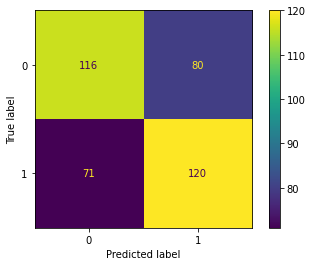

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))